In [1]:
using LogicCircuits

function ind(j,i,n)
    return i+(j-1)*n
end

n = 4

A = [LogicCircuit(Lit(i)) for i=1:n*n]

formula = LogicCircuit(true)
for k=1:n
    midformula = LogicCircuit(false)
    for i=1:n
        smallformula = LogicCircuit(true)
        for j=1:n
            if i==j
                smallformula &= A[ind(k,j,n)]
            else
                smallformula &= -A[ind(k,j,n)]
            end
        end
        midformula |= smallformula
    end
    formula &= midformula
end
formula2 = LogicCircuit(true)
for k=1:n
    midformula = LogicCircuit(false)
    for i=1:n
        smallformula = LogicCircuit(true)
        for j=1:n
            if i==j
                smallformula &= A[ind(j,k,n)]
            else
                smallformula &= -A[ind(j,k,n)]
            end
        end
        midformula |= smallformula
    end
    formula2 &= midformula
end
formula3 = formula & formula2
vtree = PlainVtree(n*n, :balanced)
manager = SddMgr(vtree)
sdd = compile(manager, formula3)
println(model_count(sdd))
println(factorial(n))
println(sdd_size(sdd))

24
24
237


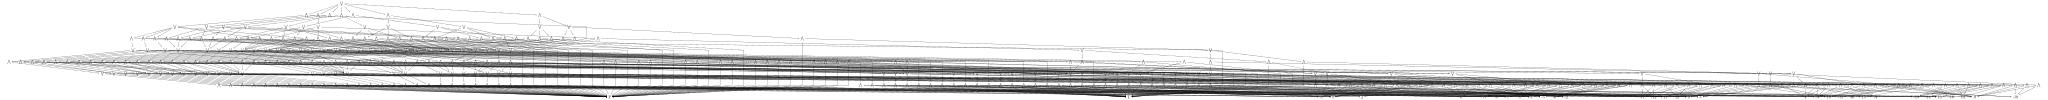

In [2]:
# plot(sdd)